In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Path to your saved embeddings
npz_path = Path("../data/output/map_out/maps_embeddings.npz")

data = np.load(npz_path, allow_pickle=True)
E = data["E"]          # (num_maps, embedding_dim)
ids = data["ids"]      # (num_maps,)
E.shape, len(ids)


((300, 256), 300)

In [3]:
df_stats = pd.DataFrame({
    "mean": E.mean(axis=0),
    "std": E.std(axis=0),
    "min": E.min(axis=0),
    "max": E.max(axis=0)
})
display(df_stats.describe())

print(f"Global mean of all features: {E.mean():.4f}")
print(f"Global std of all features:  {E.std():.4f}")


,mean,std,min,max
count,256.000000,256.000000,256.000000,256.000000
mean,0.560868,0.372179,0.367052,6.231579
std,1.713794,4.575520,0.845076,79.847374
min,-0.970999,0.000000,-1.000000,-0.192313
25%,0.008244,0.002327,0.000822,0.021143
50%,0.043298,0.010536,0.016970,0.142272
75%,0.847844,0.068992,0.573355,0.995817
max,24.530190,72.953285,8.236558,1272.983643


Global mean of all features: 0.5609
Global std of all features:  4.8906


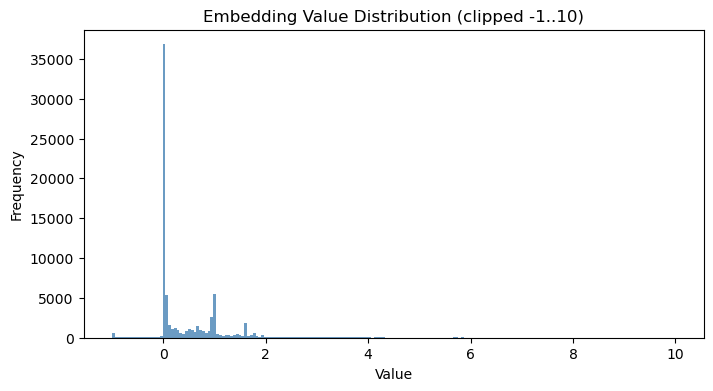

In [4]:
plt.figure(figsize=(8,4))
plt.hist(E.flatten(), bins=200, range=(-1, 10), color="steelblue", alpha=0.8)
plt.title("Embedding Value Distribution (clipped -1..10)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [5]:
# Count maps (rows) that are completely zero
num_zero_rows = np.sum(~E.any(axis=1))
perc_zero_rows = 100 * num_zero_rows / len(E)

# Count individual zero elements
num_zero_elements = np.sum(E == 0)
perc_zero_elements = 100 * num_zero_elements / E.size

print(f"Maps with all-zero embeddings: {num_zero_rows} / {len(E)} ({perc_zero_rows:.2f}%)")
print(f"Individual zero values: {num_zero_elements:,} ({perc_zero_elements:.2f}%)")


Maps with all-zero embeddings: 0 / 300 (0.00%)
Individual zero values: 9,336 (12.16%)


In [8]:
import numpy as np
import pandas as pd
import json

# --- Load embeddings and feature names ---
data = np.load("../data/output/map_out/maps_embeddings.npz", allow_pickle=True)
E = data["E"]

# try to load feature names if available
try:
    with open("../data/output/map_out/feature_names.json", "r") as f:
        feature_names = json.load(f)
except Exception:
    feature_names = [f"f{i:03d}" for i in range(E.shape[1])]

# --- Compute statistics for each feature ---
df_stats = pd.DataFrame({
    "feature": feature_names,
    "min":  E.min(axis=0),
    "max":  E.max(axis=0),
    "mean": E.mean(axis=0),
    "median": np.median(E, axis=0),
    "std":  E.std(axis=0),
    "mode": [pd.Series(E[:, i]).mode(dropna=True).iloc[0] 
             if not pd.Series(E[:, i]).mode(dropna=True).empty else np.nan
             for i in range(E.shape[1])]
})

# --- Sort by max absolute value to highlight large features ---
df_stats["abs_max"] = df_stats["max"].abs()
df_stats = df_stats.sort_values("abs_max", ascending=False)

# --- Display nicely ---
pd.set_option("display.max_rows", 50)
pd.set_option("display.precision", 4)
display(df_stats[["feature", "min", "max", "mean", "median", "std", "mode"]].head(30))


,feature,min,max,mean,median,std,mode
130,eccentricity__max,8.2366,1272.9836,24.5302,17.5186,7.2953e+01,8.2366
58,eccentricity__std,1.1394,118.0968,3.1796,2.5620,6.7418e+00,1.1394
115,elongation__max,2.4825,20.1475,4.1075,3.9133,1.2862e+00,2.4825
22,eccentricity__mean,2.5991,19.7103,3.6842,3.5684,1.0589e+00,2.5991
113,compactness__max,1.8523,12.0948,2.7988,2.6638,8.6702e-01,1.8523
238,eccentricity__q75,2.9465,6.8462,4.3026,4.2350,5.7420e-01,2.9465
252,poly_count,5.5255,6.6720,5.8660,5.8406,2.2670e-01,5.6802
125,bbox_aspect__max,1.1731,6.4647,2.0967,1.9592,6.0712e-01,1.1731
110,vertex_count__max,2.3076,4.4844,2.9504,2.9098,3.1655e-01,2.8332
202,eccentricity__q50,1.9657,4.4270,2.9190,2.8374,4.9807e-01,1.9657


In [ ]:
plt.figure(figsize=(10,4))
plt.hist(E.flatten(), bins=100, color="steelblue", alpha=0.8)
plt.title("Distribution of all embedding values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
nan_cols = np.isnan(E).any(axis=0)
inf_cols = np.isinf(E).any(axis=0)
const_cols = (E.std(axis=0) < 1e-6)

print(f"NaN dims: {nan_cols.sum()}, Inf dims: {inf_cols.sum()}, Constant dims: {const_cols.sum()}")


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

S = cosine_similarity(E)
np.fill_diagonal(S, np.nan)
print(f"Mean cosine similarity: {np.nanmean(S):.3f}, Std: {np.nanstd(S):.3f}")
plt.hist(S[~np.isnan(S)], bins=50, alpha=0.8)
plt.title("Pairwise map similarity (cosine)")
plt.xlabel("Similarity")
plt.ylabel("Count")
plt.show()


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
E2d = pca.fit_transform(E)
plt.figure(figsize=(6,5))
plt.scatter(E2d[:,0], E2d[:,1], s=20, c='royalblue', alpha=0.7)
plt.title("Map embeddings (PCA 2D projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_.sum())
